## CMPE 462 HOMEWORK 1
Due Date: 21.03.2019

In [48]:
# Allowed libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
# For loading data, you can import other libraries, but further usage is not allowed.

### 1.) Review bias/variance dilemma.
Replicate the bias-variance-plot (bias,
variance and error vs. model complexity) given in Figure 4.6 in the textbook
or in lecture notes [W04.pdf, pg.52]. For this:

* Generate 20 values {$x^t$} from the range [0, 5] from uniform distribution.  
* Generate 100 different samples $X_s$. Each sample contains 20 instances {$x^t, y^t_s$} where $y^t_s = f(x^t) + \epsilon$, $f(x) =2× sin(1.5 × x)$, and $ \epsilon ∼ N (0, 1)$.
* For each sample, fit polynomial models of order 1,3, and 5.
* Plot bias, variance and error of these models.

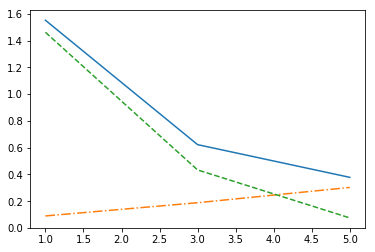

In [89]:
# Solution Here
xs = list(np.random.uniform(0,5,20))
def f(x):
    return 2 * np.sin(1.5*x)
Fx = list(map(lambda x: f(x), xs))
Xs = []
for i in range(100):
    y = list(map(lambda x: f(x) + np.random.normal(0,1,1)[0], xs))
    Xs.append([xs,y])
    
models = []
for sample in Xs:
    p1 = np.poly1d(np.polyfit(sample[0], sample[1], 1))
    p3 =  np.poly1d(np.polyfit(sample[0], sample[1], 3))
    p5 =  np.poly1d(np.polyfit(sample[0], sample[1], 5))
    models.append([p1,p3,p5])
    
gBar1 = models[0][0]
gBar3 = models[0][1]
gBar5 = models[0][2]    
for i in range(len(models)):
    gBar1 += models[i][0]
    gBar3 += models[i][1]
    gBar5 += models[i][2]
gBar1 = gBar1 / len(models)
gBar3 = gBar3 / len(models)
gBar5 = gBar5 / len(models)

gBar1values = list(map(lambda x: gBar1(x), xs))
gBar3values = list(map(lambda x: gBar3(x), xs))
gBar5values = list(map(lambda x: gBar5(x), xs))

bias1 = (sum(list(map(lambda g, f: (g-f)**2, gBar1values, Fx)))/20)**0.5
bias3 = (sum(list(map(lambda g, f: (g-f)**2, gBar3values, Fx)))/20)**0.5
bias5 = (sum(list(map(lambda g, f: (g-f)**2, gBar5values, Fx)))/20)**0.5

vars1 = (list(map(lambda gi,gBar : (gi-gBar)**2, list(map(lambda x: models[0][0](x), xs)), gBar1values)))
vars3 = (list(map(lambda gi,gBar : (gi-gBar)**2, list(map(lambda x: models[0][1](x), xs)), gBar3values)))
vars5 = (list(map(lambda gi,gBar : (gi-gBar)**2, list(map(lambda x: models[0][2](x), xs)), gBar5values)))

for i in range(1,len(models)):
    tmp1 = (list(map(lambda gi,gBar : (gi-gBar)**2, list(map(lambda x: models[i][0](x), xs)), gBar1values)))
    tmp3 = (list(map(lambda gi,gBar : (gi-gBar)**2, list(map(lambda x: models[i][1](x), xs)), gBar3values)))
    tmp5 = (list(map(lambda gi,gBar : (gi-gBar)**2, list(map(lambda x: models[i][2](x), xs)), gBar5values)))
    vars1 = [x + y for x, y in zip(vars1, tmp1)]
    vars3 = [x + y for x, y in zip(vars3, tmp3)]
    vars5 = [x + y for x, y in zip(vars5, tmp5)]

var1 = sum(vars1)/2000
var3 = sum(vars3)/2000
var5 = sum(vars5)/2000

degree = [1,3,5]

error = [var1+bias1, var3+bias3, var5+bias5]

plt.plot(degree, error, "-",degree, (var1, var3, var5), "-.", degree, (bias1, bias3,bias5), "--")




### 2.) Review cross-validation.
Replicate the cross-validation error plot (training and validation error vs. model complexity plot) given in Figure 4.7 in the textbook or in lecture notes [W04.pdf, pg52]. For this:
* Generate 10 samples containing 100 instances as in part 1.
* Split each sample to training and validation sets, fit polynomial models of order 1,3, and 5.
* Plot mean training and validation error (mean square error) of each model.

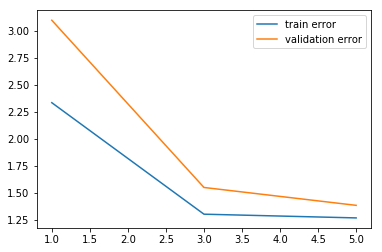

In [47]:
# Solution Here
xs = list(np.random.uniform(0,5,100))
def f(x):
    return 2 * np.sin(1.5*x)
Xs = []
training = []
validation = []
for i in range(10):
    np.random.shuffle(xs)
    trX = xs[0:80]
    vldX = xs[80:]
    trY = list(map(lambda x: f(x) + np.random.normal(0,1,1)[0], trX))
    vldY = list(map(lambda x: f(x) + np.random.normal(0,1,1)[0], vldX))
    training.append([trX, trY])
    validation.append([vldX, vldY]) 
    
models = []
for sample in training:
    p1 = np.poly1d(np.polyfit(sample[0], sample[1], 1))
    p3 =  np.poly1d(np.polyfit(sample[0], sample[1], 3))
    p5 =  np.poly1d(np.polyfit(sample[0], sample[1], 5))
    models.append([p1,p3,p5])

err1T = (list(map(lambda gi,y : (gi-y)**2, list(map(lambda x: models[0][0](x), trX)), trY)))
err3T = (list(map(lambda gi,y : (gi-y)**2, list(map(lambda x: models[0][1](x), trX)), trY)))
err5T = (list(map(lambda gi,y : (gi-y)**2, list(map(lambda x: models[0][2](x), trX)), trY)))
err1V = (list(map(lambda gi,y : (gi-y)**2, list(map(lambda x: models[0][0](x), vldX)), vldY)))
err3V = (list(map(lambda gi,y : (gi-y)**2, list(map(lambda x: models[0][1](x), vldX)), vldY)))
err5V = (list(map(lambda gi,y : (gi-y)**2, list(map(lambda x: models[0][2](x), vldX)), vldY)))
for i in range(1,len(models)):
    tmp1 = (list(map(lambda gi, y : (gi-y)**2, list(map(lambda x: models[i][0](x), trX)), trY)))
    tmp3 = (list(map(lambda gi, y : (gi-y)**2, list(map(lambda x: models[i][1](x), trX)), trY)))
    tmp5 = (list(map(lambda gi, y : (gi-y)**2, list(map(lambda x: models[i][2](x), trX)), trY)))
    tmp1V = (list(map(lambda gi, y : (gi-y)**2, list(map(lambda x: models[i][0](x), vldX)), vldY)))
    tmp3V = (list(map(lambda gi, y : (gi-y)**2, list(map(lambda x: models[i][1](x), vldX)), vldY)))
    tmp5V = (list(map(lambda gi, y : (gi-y)**2, list(map(lambda x: models[i][2](x), vldX)), vldY)))
    err1T = [x + y for x, y in zip(err1T, tmp1)]
    err3T = [x + y for x, y in zip(err3T, tmp3)]
    err5T = [x + y for x, y in zip(err5T, tmp5)]
    err1V = [x + y for x, y in zip(err1V, tmp1V)]
    err3V = [x + y for x, y in zip(err3V, tmp3V)]
    err5V = [x + y for x, y in zip(err5V, tmp5V)]
err1T = sum(err1T)/(10*80)
err3T = sum(err3T)/(10*80)
err5T = sum(err5T)/(10*80)
err1V = sum(err1V)/(10*20)
err3V = sum(err3V)/(10*20)
err5V = sum(err5V)/(10*20)

tr_errors = [err1T, err3T, err5T]
vl_errors = [err1V, err3V, err5V]

plt.plot([1,3,5], tr_errors, label='train error')
plt.plot([1,3,5], vl_errors, label='validation error')
plt.legend()

### 3.) Use of real dataset. 
Download Iris Data Set from UCI Machine Learning Repository. Randomly split it into training and test sets.
* For each feature, plot histogram of classes. For better visualiziation, plot classes in same plot but with different colors. (For this you can use plt.subplots)
* Consider only two classes: Iris Setosa and Iris Versicolour.
* Assuming Gaussian distribution, apply parametric classification, and find which particular feature (sepal length, sepal width, petal length, petal width) is most successful in classifying instances.
    - For this, treat each feature separately. find maximum likelihood estimate of the parameters $(μ, σ^2)$ of different classes using training set. (You can use plt.errorbar for visualization, use one column for each feature and visualize both classes in same plot using different colors).
    - Using these parameters, predict the classes of the instances in the test set, and calculate the error.

In [ ]:
from sklearn import datasets 
#import datasets from sklearn  
import pandas as pd 
dataset = datasets.load_iris() 
classes = dataset.target 
values=list(map(lambda x, c: np.append(x,c), dataset.data, clasesses)) 

